# Library Installations

In [17]:
# Library Installations

# !pip install pypyodbc
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

# Library Imports

In [18]:
# Imports

import pypyodbc as odbc # pip install pypyodbc
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib

# Connecting To Database & Fetching Data

## Creating Connection String

In [19]:
# Connect to database

DRIVER_NAME =   "SQL SERVER"
SERVER_NAME = "LAPTOP-KBAD6AQA\SQLEXPRESS"
DATABASE_NAME = 'Netflix'

connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={{{SERVER_NAME}}};
    DATABASE={{{DATABASE_NAME}}};
    Trust_Connection=yes;
"""


## Establishing A Connection To Database and Fetching Data

In [20]:
try:
    # Establish a connection
    conn = odbc.connect(connection_string)

    # Create a cursor
    cursor = conn.cursor()

    # Example query
    query = "SELECT * FROM Streaming_Data"
    cursor.execute(query)

    # Fetch and print results
    rows = cursor.fetchall()

except odbc.Error as e:
    # Print Error
    print(f"Error: {e}")

finally:
    # Close the connection
    if conn:
        conn.close()

# Creating a Dataframe

In [21]:
# Convert tuples to numpy arrays
arrays = [np.array(row) for row in rows]

# Create a DataFrame from the arrays
columns = ["User_ID", "Session_ID", "Device_ID", "Video_ID", "Duration_Watched_minutes","Genre", "Country", "Age", "Gender", "Subscription_Status", "Ratings", "Languages", "Device_Type", "Location", "Playback_Quality", "Interaction_Events"]
df = pd.DataFrame(arrays, columns=columns)

# Print the DataFrame
print(df.head())

                                User_ID                            Session_ID  \
0  eb4f9229-74df-45f6-baac-cf19241b8b30  cb2142a7-0750-49ed-b8ac-a975fe1ff69a   
1  661d4b59-4328-410a-901c-1e3b4c40c334  3bc0a662-b353-4015-8b0c-55ceb510d13a   
2  dd3fe9e9-ea82-4891-ab93-8a47c80e3251  bd545b4a-9f54-4e87-b9f8-15ae20b44f22   
3  a1b3365b-1d00-4ddf-bc43-02fc9c10c680  0441086d-c59e-478d-a496-5c5b995ecfdb   
4  338d3f91-5f1c-4590-8803-324901826406  0295f01d-7f15-4799-856c-90c688697ef8   

  Device_ID Video_ID Duration_Watched_minutes        Genre  \
0       232       11              90.04452533       Sci-Fi   
1       549       85              68.97347929       Comedy   
2       844       50              42.51134326       Comedy   
3       201       38              53.31666005  Documentary   
4       700       31              69.43778589       Action   

                            Country Age  Gender Subscription_Status Ratings  \
0                             Sudan  56  Female             P

# Cleaning DataFrame

## Getting Rid Of Not Needed Columns

In [22]:
# Getting rid of User_ID, Session_ID, Device_ID, Video_ID columns 
df = df.iloc[:, 4:]

## Checking Data Types Of Columns

In [23]:
for column in df.columns:
    data_type_series = df[column].apply(type)
    unique_data_types = data_type_series.unique()
    print(f"Column: {column}, Unique Data Types: {unique_data_types}")


Column: Duration_Watched_minutes, Unique Data Types: [<class 'numpy.str_'>]
Column: Genre, Unique Data Types: [<class 'numpy.str_'>]
Column: Country, Unique Data Types: [<class 'numpy.str_'>]
Column: Age, Unique Data Types: [<class 'numpy.str_'>]
Column: Gender, Unique Data Types: [<class 'numpy.str_'>]
Column: Subscription_Status, Unique Data Types: [<class 'numpy.str_'>]
Column: Ratings, Unique Data Types: [<class 'numpy.str_'>]
Column: Languages, Unique Data Types: [<class 'numpy.str_'>]
Column: Device_Type, Unique Data Types: [<class 'numpy.str_'>]
Column: Location, Unique Data Types: [<class 'numpy.str_'>]
Column: Playback_Quality, Unique Data Types: [<class 'numpy.str_'>]
Column: Interaction_Events, Unique Data Types: [<class 'numpy.str_'>]


## Converting Columns To the Correct Data Type

In [24]:
# Convert 'Duration_Watched_minutes' column to float
df['Duration_Watched_minutes'] = df['Duration_Watched_minutes'].astype(float)

# Convert 'Age' column to integers
df['Age'] = df['Age'].astype(int)

# Convert 'Ratings' column to integers
df['Ratings'] = df['Ratings'].astype(int)

# Convert 'Interaction_Events' column to integers
df['Interaction_Events'] = df['Interaction_Events'].astype(int)

## Verifying Data Types Changes Of Columns Was Successful

In [25]:
# Iterates Through Columns In Database
for column in df.columns:

    # Gets Data Type of Column
    data_type = df[column].dtype

    # Boolean Statements Display Variable Type & Size Information if Int or Float
    if np.issubdtype(data_type, np.integer):
        int_size = np.iinfo(data_type).bits
        print(f"Column: {column}, Data Type: int{int_size}")
    elif np.issubdtype(data_type, np.floating):
        float_size = np.finfo(data_type).bits
        print(f"Column: {column}, Data Type: float{float_size}")
    else:
        print(f"Column: {column}, Unique Data Types: {df[column].apply(type).unique()}")


Column: Duration_Watched_minutes, Data Type: float64
Column: Genre, Unique Data Types: [<class 'numpy.str_'>]
Column: Country, Unique Data Types: [<class 'numpy.str_'>]
Column: Age, Data Type: int32
Column: Gender, Unique Data Types: [<class 'numpy.str_'>]
Column: Subscription_Status, Unique Data Types: [<class 'numpy.str_'>]
Column: Ratings, Data Type: int32
Column: Languages, Unique Data Types: [<class 'numpy.str_'>]
Column: Device_Type, Unique Data Types: [<class 'numpy.str_'>]
Column: Location, Unique Data Types: [<class 'numpy.str_'>]
Column: Playback_Quality, Unique Data Types: [<class 'numpy.str_'>]
Column: Interaction_Events, Data Type: int32


## Checking For Missing Values within DataSet

In [26]:
# Check for missing values, special symbols, None, and empty strings
missing_values = df.applymap(lambda x: pd.isna(x) or x is None or x == "" or str(x).strip() == "")

# Identify rows with missing values
rows_with_missing = missing_values.any(axis=1)

# Remove rows with missing values
df = df[~rows_with_missing]

# Display information about the removed rows
removed_rows = df[rows_with_missing]
print(f"Number of removed rows with missing values: {len(removed_rows)}")
print(removed_rows)

Number of removed rows with missing values: 0
Empty DataFrame
Columns: [Duration_Watched_minutes, Genre, Country, Age, Gender, Subscription_Status, Ratings, Languages, Device_Type, Location, Playback_Quality, Interaction_Events]
Index: []


## Checking For Duplicate Rows Within DataSet

In [27]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Identify and print duplicate rows
duplicates = df[duplicate_rows]
print("Duplicate Rows:")
print(duplicates)

# Drop duplicate rows and create a new DataFrame
df = df.drop_duplicates()

# Display information about the cleaned DataFrame
print("DataFrame without Duplicates:")
print(df.head())

Duplicate Rows:
Empty DataFrame
Columns: [Duration_Watched_minutes, Genre, Country, Age, Gender, Subscription_Status, Ratings, Languages, Device_Type, Location, Playback_Quality, Interaction_Events]
Index: []
DataFrame without Duplicates:
   Duration_Watched_minutes        Genre                           Country  \
0                 90.044525       Sci-Fi                             Sudan   
1                 68.973479       Comedy                              Cuba   
2                 42.511343       Comedy                             Japan   
3                 53.316660  Documentary  Lao People's Democratic Republic   
4                 69.437786       Action                        Bangladesh   

   Age  Gender Subscription_Status  Ratings Languages Device_Type  \
0   56  Female             Premium        3   Spanish  Smartphone   
1   52    Male             Premium        3   Chinese     Desktop   
2   14  Female             Premium        3   Spanish      Tablet   
3   36    Male  

## Checking For Outliers Within DataSet

In [28]:
# Define a function to identify outliers based on IQR
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Apply the function to each numeric column in the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32', 'float32']).columns
outliers_df = df[numeric_columns].apply(identify_outliers)

# Display rows with outliers
rows_with_outliers = df[outliers_df.any(axis=1)]
print("Rows with Outliers:")
print(rows_with_outliers)

# Alternatively, you can remove rows with outliers
df = df[~outliers_df.any(axis=1)]
print("DataFrame without Outliers:")
print(df.head())


Rows with Outliers:
Empty DataFrame
Columns: [Duration_Watched_minutes, Genre, Country, Age, Gender, Subscription_Status, Ratings, Languages, Device_Type, Location, Playback_Quality, Interaction_Events]
Index: []
DataFrame without Outliers:
   Duration_Watched_minutes        Genre                           Country  \
0                 90.044525       Sci-Fi                             Sudan   
1                 68.973479       Comedy                              Cuba   
2                 42.511343       Comedy                             Japan   
3                 53.316660  Documentary  Lao People's Democratic Republic   
4                 69.437786       Action                        Bangladesh   

   Age  Gender Subscription_Status  Ratings Languages Device_Type  \
0   56  Female             Premium        3   Spanish  Smartphone   
1   52    Male             Premium        3   Chinese     Desktop   
2   14  Female             Premium        3   Spanish      Tablet   
3   36    Male

# Data Analysis

## Genres Analysis

### Most Highly Rated Genres on Netflix

In [29]:
# Group by 'Genre' and get the 'Ratings' for each group
genre_ratings = df.groupby('Genre')['Ratings'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)

         Genre   Ratings
0       Action  3.041748
1       Comedy  3.013553
2  Documentary  2.928638
3        Drama  3.016080
4       Sci-Fi  2.962536
5     Thriller  2.965714


### Most Watched Genres on Netflix

In [30]:
# Group by 'Genre' and get the mean of 'Duration_Watched_minutes'
genre_ratings = df.groupby('Genre')['Duration_Watched_minutes'].mean().reset_index()

# Print the DataFrame with genres and their mean ratings
print(genre_ratings)

         Genre  Duration_Watched_minutes
0       Action                 60.164136
1       Comedy                 58.563143
2  Documentary                 62.049858
3        Drama                 60.714402
4       Sci-Fi                 59.993830
5     Thriller                 60.741918


### Most Popular Genres On Netflix

### Amount Of Genres On Netflix

Amount of Genres On Netflix
Documentary    1065
Thriller       1050
Sci-Fi         1041
Comedy         1033
Action         1030
Drama           995
Name: Genre, dtype: int64


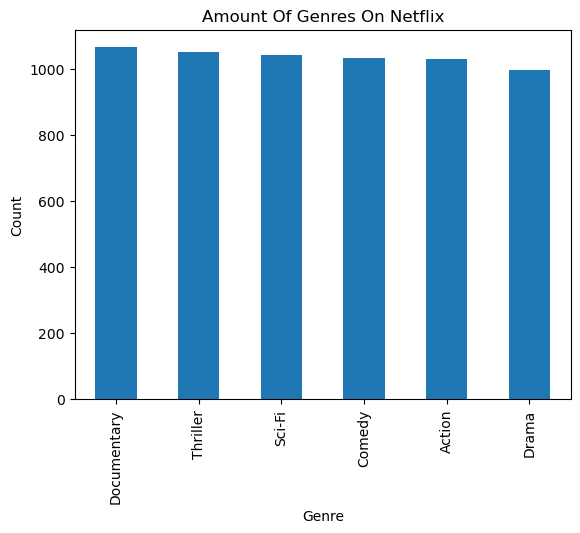

In [31]:
# Counts The Genres in The Column Genre
genre_counts = df['Genre'].value_counts()

# Print the most popular genres
print("Amount of Genres On Netflix")
print(genre_counts)

# Plot the most popular genres
genre_counts.plot(kind='bar')
plt.title('Amount Of Genres On Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Netflix Content Consumption Analysis

### Most Popular Devices Used On Netflix

Amount of Device Types On Netflix
Smart TV      1306
Desktop       1270
Smartphone    1233
Tablet        1217
Laptop        1188
Name: Device_Type, dtype: int64


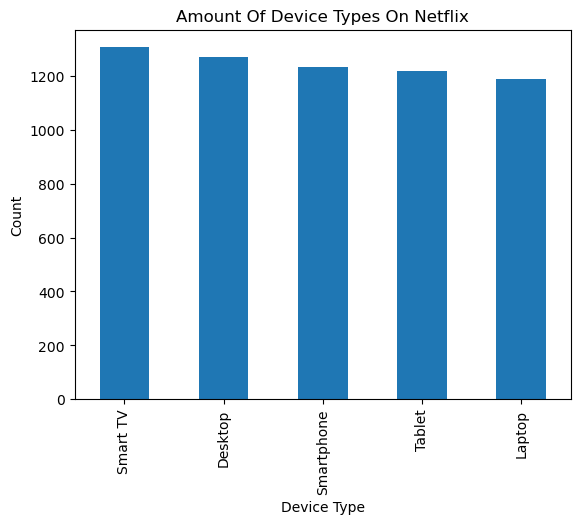

In [33]:
# Counts The Devices Types in The Column Device Type
device_counts = df['Device_Type'].value_counts()

# Print the most popular genres
print("Amount of Device Types On Netflix")
print(device_counts)

# Plot the most popular genres
device_counts.plot(kind='bar')
plt.title('Amount Of Device Types On Netflix')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

### Most Popular Playback Quality Used On Netflix

Amount of Most Popular Playback Quality On Netflix
4K    2092
SD    2066
HD    2056
Name: Playback_Quality, dtype: int64


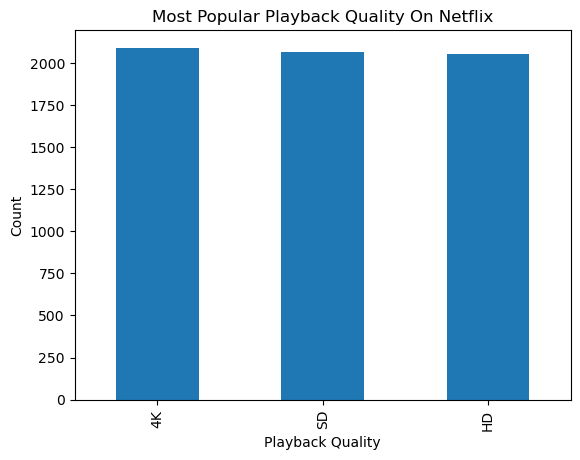

In [35]:
# Counts The Devices Types in The Column Device Type
playbackQuality_counts = df['Playback_Quality'].value_counts()

# Print the most popular genres
print("Amount of Most Popular Playback Quality On Netflix")
print(playbackQuality_counts)

# Plot the most popular genres
playbackQuality_counts.plot(kind='bar')
plt.title('Most Popular Playback Quality On Netflix')
plt.xlabel('Playback Quality')
plt.ylabel('Count')
plt.show()

### Most Popular Subscription Status Used On Netflix

In [ ]:
# Counts The Devices Types in The Column Device Type
subscription_status_counts = df['Subscription_Status'].value_counts()

# Print the most popular genres
print("Most Popular Subscription Status On Netflix")
print(subscription_status_counts)

# Plot the most popular genres
subscription_status_counts.plot(kind='bar')
plt.title('Most Popular Subscription Status On Netflix')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

## User Demographics Data Analysis

### Age Analysis

Ideas

- Explore the age distribution of Netflix users. You can create age groups (e.g., 18-24, 25-34, 35-44, etc.) and determine whether there are any significant differences in content preferences between users within these age groups.

### Gender Analysis

Ideas

- Investigate the gender distribution of Netflix users. Determine whether there are any significant differences in content preferences between male and female users.

## Geographic Trends

Ideas

- Analyze user demographics based on geographical location. Explore which regions or countries have the highest concentration of Netflix users and whether there are regional preferences in terms of content.

Ideas to Improve Code

Functions

Notes of What I have Learned

- Always know what are all the options that a column can have for a value
- Always know the data type that the values of the column you are working with are, ex. make sure numbers are not strings
- Do not make a column of numbers a string in the database lol
- Check datatypes of dataframe after creating it from tuples converted to arrays to df
- Reminded of Mean, Median, Mode, Range, Variance, Standard Deviation, Quartiles, Interquartile Range (IQR), Skewness, Kurtosis (look at box & whisker plot)